In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

<h1>Computational Phyiscs: Project 2<h1>

**II. ONE-DIMENSIONAL WAVES ON A STRING:**

**NOTE :**

Attatched with this project will be a PDF with analytical work, that will directly complement the work shown in this report. The section and related question will be indicated properly on this analytical PDF.

**Question 1**

Recall that the one-dimensional wave equation can be separated into two ordinary differential equations in x and t, respectively. The x-equation is,

$\frac{d^2y}{dx^2}$ = $-k^2y.$                                                                                                            (1)

Consider a horizontal string of length L tied down at both ends so that

$y(x = 0) = y(x = L) = 0$. (2)

Rewrite equation (1) in terms of appropriate dimensionless variables. Along the way, please
clearly indicate the physical scales you used.

Here is the dimensionless equation scaled by the physical length **L**, 


$\frac{d^2\bar{y}}{d\bar{x}^2}$ = $-\bar{k}^2\bar{y}.$ 




**Question 2**

Rewrite your dimensionless equation (1) as two first-order differential equations, and
create functions that capture the right-hand side of these equations.

$f(x) = \frac{d\bar{y}}{d\bar{x}}$
&
$f'(x) = -\bar{k}^2\bar{y}$

**Question #3 - 5** : in the next two cells

(0.0, 1.0)

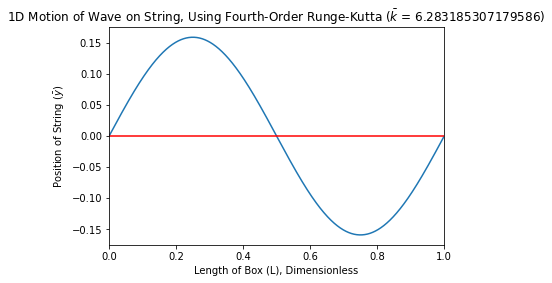

In [2]:
##In this cell we create functions that represent the right hand side (RHS) of these equations above.

def f (dydx): #this is the first ODE that is a function that returns its intput.
    return dydx

def dfdx(kbar, ybar): # this is the second first order ODE
    return -kbar**2 * ybar


def RK4(a,lam,L,h): #here is my Runge-Kutta fourth order program. 

 ###This is where I am going to initialize some key variables

 ###These are defined based on the inputs to the funciton

    N = int(L/h) ##Here I am going to generate the number of steps I want to take. This generated by my stepsize and Length of the box. 
    x = np.linspace(0,L, N) #This is the initializtion of x values
    y_bar = np.zeros(N) #array filled with zeros. I will hold my solutions for ybar here
    derr = np.zeros(N)  #I will hold my solutions of the derivative here
    k_bar = 2*np.pi/lam ## Here I will generate kbar values based on lambdas. 
                        ##for this problem we know the eigen values alread, but we will not in the future, so I will use kbar as a variable to search through eigen values


    #intial conditions
    y_bar[0] = 0
    
    derr[0]= a ##this is the inital slope of my string, kinda representing how hard I pluck it and in what direction
    
   

    for i in range(1, N): 

        k1dfdx = h *dfdx(k_bar, y_bar[i - 1])
        k1f = h * f(derr[i - 1])

        k2dfdx = h * dfdx(k_bar, y_bar[i-1] + k1f/2)
        k2f = h * f(derr[i -1] + k1dfdx/2) 

        k3dfdx = h * dfdx(k_bar, y_bar[i - 1] + k2f/2)
        k3f = h *f(derr[i -1] + k2dfdx/2) 


        k4dfdx= h * dfdx(k_bar, y_bar[i - 1] + k3f)
        k4f = h * f(derr[i - 1] + k3dfdx)

        y_bar[i] = y_bar[i - 1] + (k1f + 2 * k2f + 2 * k3f + k4f)/ 6
        derr[i] = derr[i - 1] + (k1dfdx + 2 * k2dfdx + 2 * k3dfdx + k4dfdx)/6

    return x, y_bar, derr, N, k_bar

##Here are the values of box length, initial derivative and step size, respectfully
L = 1
a = 1
h = 0.001

lambda_value = 1

x,y, der, N, kbar = RK4(a,lambda_value, L, h) #I call on my solver here

#plot statments 
plt.plot(x, y)
plt.axhline(0,color = 'red')
plt.xlabel('Length of Box (L), Dimensionless')
plt.ylabel(r'Position of String ($\bar{y}$)')
plt.title(rf'1D Motion of Wave on String, Using Fourth-Order Runge-Kutta ($\bark$ = {kbar})')
plt.xlim(0,L)


**NOTE:**

The intial condition "a" describes the slop of the initial pluck of our string. However, the behavior will still be the same at the end of the box length L. 

In [3]:
#all of the following variables are being intialized to hunt for the eigen values
m = 10000 #resoution of my eigen value search
lam = np.linspace(2.6,0.5,m+1) #This is the array of lambdas that I will use to generate eigen values
yL=np.zeros(m+1)
ks = np.zeros(m + 1)
eigen_values = []
tolarence = L/1000

count = 0 #counter for the current eigen value that the loop is on 
print('Here are the eigen values for the nth harmonic mode of motion on a string :')
for j in range(0,m+1): #begin the loop to look for eigen values
    
    x,y1, der, N, kbar = RK4(a,lam[j],L,h) #calling my solver for a specific lambda value
    yL[j]= y1[-1] #selecting the y(x = L) position, to later test where if this lambda is an eigen value
    ks[j] = kbar #saving my the wavenumber that is produced from the lambda value

    if yL[j]*yL[j-1]<0: #this conditional statement is used to test is the y(x = L)position has changed sign

        #the block below the if statement generates and stores information about the wavenumber that triggered a standing wave mode
        
        count += 1 #if this statement triggers, we have an eigen value, so up the count
        count_s = str(count)
        diff = str(ks[j]- ks[j - 1]) #this is giving me a difference in the eigen bounds
        tuple = 'Difference in bounds = ' + diff, " " + "Tolerance on bounds = " + str(tolarence)
        bounds = [ks[j],ks[j - 1]]
        eigen_values.append(bounds)

        print("---------------------------------")
        print("")
        print("Bounds on the eigen value for harmonic mode n = " + count_s + ",", "{",'k = ',ks[j],",",'k = ',ks[j-1],"}")
        print("")
        print(*tuple)
        print("---------------------------------")


Here are the eigen values for the nth harmonic mode of motion on a string :
---------------------------------

Bounds on the eigen value for harmonic mode n = 1, { k =  3.1448475708255974 , k =  3.144517054450432 }

Difference in bounds = 0.00033051637516523513  Tolerance on bounds = 0.001
---------------------------------
---------------------------------

Bounds on the eigen value for harmonic mode n = 2, { k =  6.289726622867368 , k =  6.28840468306653 }

Difference in bounds = 0.0013219398008379457  Tolerance on bounds = 0.001
---------------------------------
---------------------------------

Bounds on the eigen value for harmonic mode n = 3, { k =  9.43562893404353 , k =  9.432654227048966 }

Difference in bounds = 0.002974706994564258  Tolerance on bounds = 0.001
---------------------------------


This makes sense, because we are expecting k values to be in the form: $\frac{n\pi}{L}$. Where we have set L = 1, so $k = \pi, 2\pi, 3\pi$ is accurate. **NICE !**

**Question #6**

Continue the process to obtain numerical estimates for the wave numbers and frequencies of the first two higher harmonics (n = 2 and n = 3). What is the fractional discrepancy between your numerical results and the 'true' analytic answers?

In [4]:
###show the fractional difference between the true values of the higher order harmonics and their numerical answer. 
harmonic_2 = 2*np.pi  #these variables store the true analytic values of the first two higher harmonics 
harmonic_3 = 3*np.pi

numerical_2 = eigen_values[1] #these varaibles give me the pair of wavenumbers that I stored in an array. I need to average these values.
numerical_3 = eigen_values[2]

##let me now take an average between these bounds,
##this should give me the numerical estimate on the eigen values
average2 = (numerical_2[0] + numerical_2[1]) / 2
average3 = (numerical_3[0] + numerical_3[1])/2


###we are going to calculate the percent differnce of the theoretical value to our numerical value
###this will give us a good idea of the fractional descrepency between the two values

#calculating the percent difference
percent_diff_2 =str((abs(average2 - harmonic_2))/((average2 + harmonic_2)/2))
percent_diff_3 =str((abs(average3 - harmonic_3))/((average3 + harmonic_3)/2))

print('Fractional difference between my numerical value for n = 2 harmonic and the true value of 2pi = ' + percent_diff_2)
print('')
print('Fractional difference between my numerical value for n = 3 harmonic and the true value of 3pi = ' + percent_diff_3)

Fractional difference between my numerical value for n = 2 harmonic and the true value of 2pi = 0.0009354483625888567

Fractional difference between my numerical value for n = 3 harmonic and the true value of 3pi = 0.0009930176282214821


**Question #7**

Possible physical wave forms on the string are of course not limited to sines and cosines. Problem 3 in Problem Set 3 is an example where a string is initially plucked into a clearly non-sinusodial shape. Write a code to numerically evaluate (Using your favorite method) the integrals that gives the first ten non-vanishing Fouruer coefficients ($C_n s$). **For this and subsequent questions, please use the exact analytic solutions for the allowed standing wave modes on the bounded string.**

These are the list of Fourier Coefficents  ------>  [1.052960627795899, -2.348814183786024e-15, -0.04211842519497521, 0.021488992488833798, 5.966236631970678e-16, -0.008702154034614265, 0.006230536345239085, -2.1646351613314636e-16, -0.0036434624662209855, 0.0029167885290123773, 5.936531843238436e-17, -0.001990473862992339, 0.0016847370909392786, 2.441393579771778e-16, -0.001252034126686418]


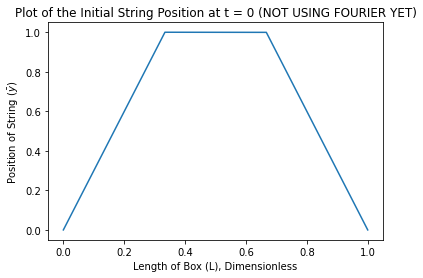

In [5]:
ns = np.arange(1,32,2) # array of n's that wont vanish ODD !
x = np.linspace(0,L,100000) ##This is the position array that has 100000 steps

#this is my trusty function for trapezoid rule that takes in an array of values from the functions ouput
def trap(f,x): 
    integral = 0
    for i in range(len(f) - 1):
        integral += 0.5 * (f[i] + f[i+1]) * (x[i+1] - x[i])
    return integral

#this is the block of code that I used to build my solution for the initial position on the string
#NOTE: L = 1 here or what ever L was used in the code for the previosu questions

def squiggle_funk(x):
    #this code uses if statements to produce the non sinusoidal restrictions on the string from PS 3
    squiggle = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] < L/3: 
            squiggle[i] = 3*x[i]/L
        elif x[i] <= 2*L/3: 
            squiggle[i] = 1
        else: 
            squiggle[i] = -3*x[i]/L + 3

    return squiggle

#this is the function that I use to create an array integrad values for my trap function
#NOTE: This integrand represents the analytic solutions for the allowed standing wave modes on the bounded string
#The PDF shows where this comes from.

def integrand(squiggle, n): 
    return squiggle*np.sin((n*np.pi*x)/(L))

#this is an empty list that I will use to store my fourier coefficents
fourier_coefficents = []
squigg = squiggle_funk(x) # this is the shape of the string at t = 0

for i in range(0, len(ns)- 1): ## in this loop we are caclulating the fourier coefficents

        funk = (2/L)*integrand(squigg, ns[i]) 
        integral = trap(funk, x)
        fourier_coefficents.append(integral)

     
print("These are the list of Fourier Coefficents" ," ------> ", fourier_coefficents)

plt.title('Plot of the Initial String Position at t = 0 (NOT USING FOURIER YET)')
plt.plot(x,squigg)
plt.xlabel('Length of Box (L), Dimensionless')
plt.ylabel(r'Position of String ($\bar{y}$)')
plt.show()

Next cells contain 8 and 9...


**Question 8**

Numerically compute and plot successive partial sums of the Fourier series representing the inital shape of the string at t = 0 up to the first ten non-vanishing terms. Does your final plot (that includes all ten terms) resemble the exact position of the string at t = 0?

**Question 9**

Numerically evaluate the full time dependent motion of the string using the first ten Fourier terms. 
Plot spatial snapshots of the solution at several (maybe five ?) representative times. YOu are welcome to instead make a movie that shows the string's motion if you like? 


In [3]:
v_p = 1 #this is the phase veolcity #sqrt(tension/linear mass density)
#I set to one because why not 

def k(n):
    return n*np.pi/L #this is a function that produces wavenumbers. These will later go into my decomposition

def omega(k): #this function creates omega values based on value numbers. Later used in my decomposition
    return k * v_p

#This function is what generates the fourier partial decomposition
# We are able to only have one input, time, so that we can create the time dependent solution
def partial_composition(t): 
    #time = np.linspace(0,t,len(x))
    summ = 0 #start my partial sum at zero
    for i in range(0,len(fourier_coefficents)): #this loop generates a partial sum for a particular time. 
          summ += fourier_coefficents[i]*np.sin(k(ns[i])*x)*np.cos(omega(k(ns[i]))*t)
          #it is really important that at each time value, the loop generates a solution using all of my fourier coefficents
          #I think this is key because creating it like this is what allowd the slider to finally work

    plt.figure()
    plt.title('Plot of the Strings Position, Move slider to show the position of the String as a function of time (USING FOURIER)')
    plt.plot(x, summ)
    plt.xlabel('Length of Box (L), Dimensionless')
    plt.ylabel(r'Position of String ($\bar{y}$)')
    plt.ylim(-2,2)
    plt.show()


widgets.interact(partial_composition, t=(0,200,0.0001)) #20 seconds

interactive(children=(FloatSlider(value=100.0, description='t', max=200.0, step=0.0001), Output()), _dom_class…

<function __main__.partial_composition(t)>

**NOTE:** Question 8 asks if my final plot (that includes all ten Fourier terms) resembles the exact solution of the string at t = 0. If you set the time slider to 0.00 you will see that the position of the string exactly matches the true solution. **THE TRUE SOLUTION IS PLOTTED ABOVE**

**III. Schrödinger Equation with Morse Potential**

**NOTE:** Questions 1 - 10 will be answered in depth on the attatched document with analytical solutions.

The next cell will address questions 11, 12, 13 and 14.

**Question 11**

Write a program that uses 4th order Runge-Kutta method to calculate $\bar{\psi}{(\bar{x})}$. Please specidy the parameters that your solver needs as input.

**Question 12:** 

Before proceeding, we first need to adress an additional complication compared to part I. For the Morse potential, the wave function vanishes as $\bar{x}$ goes to $\infty$ instead of at a finite value. **How will you get around this difficulty numerically?**

My initial thoughts are to make L bigger than our physical time scale $\bold{\frac{1}{a}}$, this difference allows us to satisfy the condition that our potential vanishes at infinity.

**Question 13:**

Extend your program so that it can systematically obtain the lowest eight energy eigen-
values and associated solutions. The general approach is similar to what you did in Part I.
For this part, please use the following parameters:

$D = 100(\frac{\hbar^2}{2\mu x_{0}^2})$ and $\bar x_0 = ax_0 = 0.7.$


**Question 14:**

Compute and plot the wave functions (energy eigenfunctions) corresponding to the
energies you obtained. Please over plot the potential on the same graph(s).

-------------------------

Bounds on Energy Eigen Values n = 1, { -0.931 , -0.9319999999999999 }

('Difference in bounds = 0.0009999999999998899', 'Tolerance = 0.005')
-------------------------


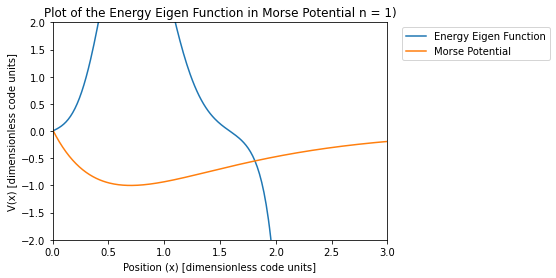

-------------------------

Bounds on Energy Eigen Values n = 2, { -0.8 , -0.8009999999999999 }

('Difference in bounds = 0.0009999999999998899', 'Tolerance = 0.005')
-------------------------


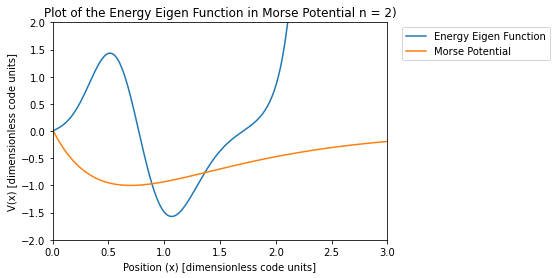

-------------------------

Bounds on Energy Eigen Values n = 3, { -0.679 , -0.6799999999999999 }

('Difference in bounds = 0.0009999999999998899', 'Tolerance = 0.005')
-------------------------


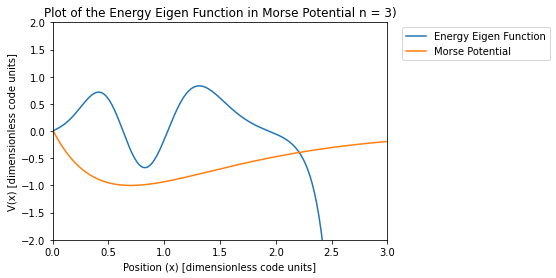

-------------------------

Bounds on Energy Eigen Values n = 4, { -0.5680000000000001 , -0.569 }

('Difference in bounds = 0.0009999999999998899', 'Tolerance = 0.005')
-------------------------


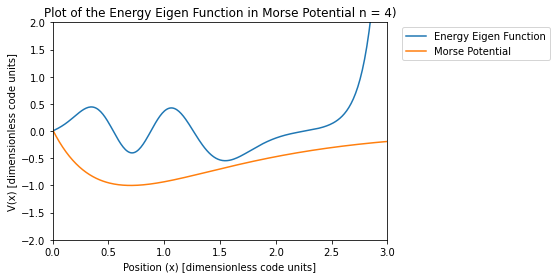

-------------------------

Bounds on Energy Eigen Values n = 5, { -0.46599999999999997 , -0.46699999999999997 }

('Difference in bounds = 0.0010000000000000009', 'Tolerance = 0.005')
-------------------------


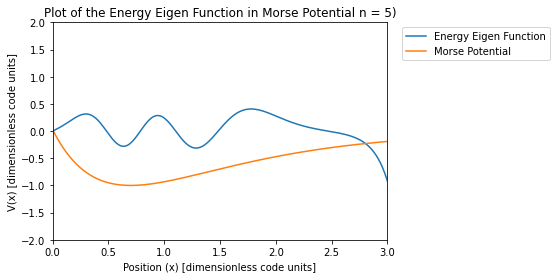

-------------------------

Bounds on Energy Eigen Values n = 6, { -0.374 , -0.375 }

('Difference in bounds = 0.0010000000000000009', 'Tolerance = 0.005')
-------------------------


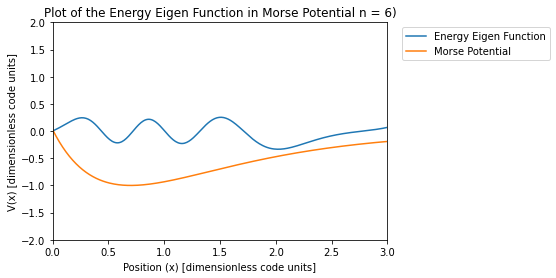

-------------------------

Bounds on Energy Eigen Values n = 7, { -0.29200000000000004 , -0.29300000000000004 }

('Difference in bounds = 0.0010000000000000009', 'Tolerance = 0.005')
-------------------------


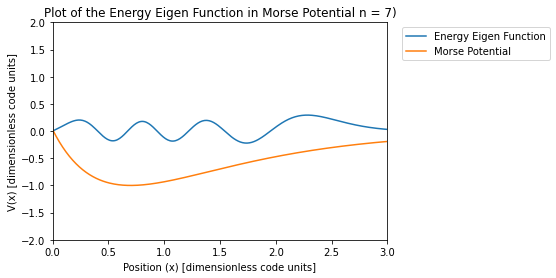

-------------------------

Bounds on Energy Eigen Values n = 8, { -0.21899999999999997 , -0.21999999999999997 }

('Difference in bounds = 0.0010000000000000009', 'Tolerance = 0.005')
-------------------------


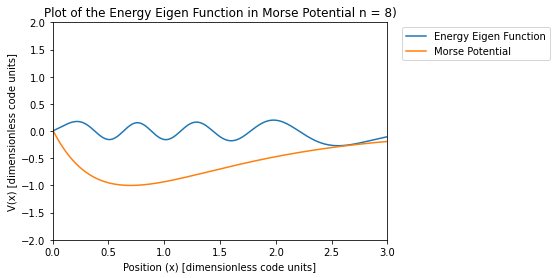

-------------------------

Bounds on Energy Eigen Values n = 9, { -0.15700000000000003 , -0.15800000000000003 }

('Difference in bounds = 0.0010000000000000009', 'Tolerance = 0.005')
-------------------------


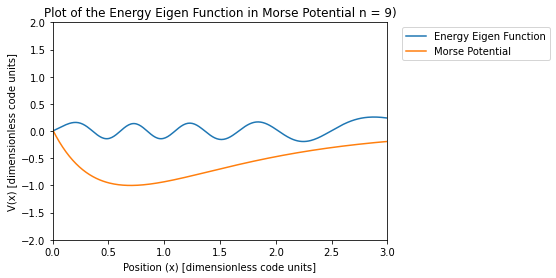

In [8]:
##I will now use RK4 methods to solve the Schrodinger equation with Morse potential

#this value is specified in the project instructions

x_0 = 0.7 # this is the value of x knot that will be used in the potential

#this constant is the prefactor of the potential. 
#the attacthed document goes over indepth how our unitless conversion turns a 
#complicated prefactor into this simple constant that we see.

constant = -100/x_0**2

#these next lines of code our my two first order ODE for the Schrodinger equation with Morse potential
def dpsi_dx (f): 
    return f

def df_dx(x, psi, E):
    return constant*(E*psi - (np.exp(-2*(x - x_0)) - 2*np.exp(-(x - x_0)))*psi)


#here I will implement my program for RK4 on SChrodinger with morse potential
def solver(psi0, f0, x, E, h):

    N = int(x/h) 
    psis = np.zeros(N) 
    f = np.zeros(N)   
    x_values  = np.linspace(0, x, N)



    #intial conditions
    psis[0] = psi0
    f[0] = f0 
    

    for i in range(1, N): 

        k1f = h *df_dx(x_values[i - 1], psis[i - 1],E)
        k1psi = h * dpsi_dx(f[i - 1])

        k2f = h * df_dx(x_values[i -1] + h/2, psis[i - 1] + k1psi/2, E)
        k2psi = h * dpsi_dx(f[i - 1] + k1f/2) 


        k3f = h * df_dx(x_values[i -1] + h/2, psis[i - 1] + k2psi/2, E)
        k3psi = h * dpsi_dx(f[i - 1] + k2f/2) 


        k4f = h * df_dx(x_values[i - 1] + h, psis[i - 1] + k3psi, E)
        k4psi = h * dpsi_dx(f[i - 1] + k3f)

        f[i] = f[i - 1] + (k1f + 2 * k2f + 2 * k3f + k4f)/ 6
        psis[i] = psis[i - 1] + (k1psi + 2 * k2psi + 2 * k3psi + k4psi)/6

    return x_values, f, psis

#this line of code should give me the solution to the morse potential, so that I can plot this over the value of the energy eigen functions
#I will use the dimensionless Morse potential that was used in the Schrodinger equation

def Morse(x): 
    return np.exp(-2*(x - x_0)) - 2*np.exp(-(x - x_0))


#this is the cell that shows us the current intputs to our solver function 

psi0 = 0 #this must be zero because the two atoms cannot physically touch or overlap
f0 = 1 #this variable represents the inital condition for dpsi/dx. THIS VALUE CANNOT BE ZERO 
L = 5 #the length that I want to go on the x axis
#this value needs to be longer than our physical length scale

h = 0.01 #step size, this is quite small, anything bigger blows up my compter

#lets first estimate the groundstate of the atoms reduced mass.
#from the analytical work we see that the value of k can be found using a taylor expansion. 
# I showed that k = 2*a**2*D
#thus the ground state energy of the harmonic oscillator will be equal to - D + hbar*omega/2 
##where omega = (k/mu)**1/2


#these variables are set up to hunt and store the energy eigen values and energy eigen function
m=1000
E=np.linspace(-1,0,m+1)  # as I showed in the analytical work, the valid energy levels are between - D and 0, here we see that in our scaled units -D = -1 
psiL=np.zeros(m+1)
Energy_eigen_functions = np.zeros(m + 1)


#this is my routine to store the energy eigen values and their corresponding functions
count = 0
for j in range(0,m+1):

    x,f, psis = solver(psi0, f0, L, E[j], h)
    psiL[j]= psis[-1]    


    if psiL[j]*psiL[j-1]<0:
    
        count += 1 
        count_s = str(count)


        diff = str(E[j]- E[j - 1])
        tuple = 'Difference in bounds = ' + diff, "Tolerance = " + str(L/1000)
        bounds = [E[j],E[j - 1]]
        eigen_values.append(bounds)

        print('-------------------------')
        print("")
        print("Bounds on Energy Eigen Values n = " + count_s + ",", "{",E[j],",", E[j-1],"}")
        print("")
        print(tuple)
        print('-------------------------')

        plt.figure()
        plt.title(fr'Plot of the Energy Eigen Function in Morse Potential n = {count_s})')
        plt.plot(x, psis, label = 'Energy Eigen Function') #in this line, everytime that I find an eigen value, I am going to plot the energy eigen function, in the end I want to plot 8 energy eigen functions
        plt.plot(x, Morse(x),label = 'Morse Potential')
        plt.xlabel('Position (x) [dimensionless code units]')
        plt.ylabel('V(x) [dimensionless code units]')
        plt.legend(loc  = 'upper right', bbox_to_anchor =(1.5, 1))
        plt.xlim(0,3)
        plt.ylim(-2,2)
        plt.show()


        if count == 9: 
            break